# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chengdorothy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chengdorothy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chengdorothy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words('english')

In [3]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 100
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#     print(f"   ---> {len(reviews)} total reviews")

In [8]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

,reviews
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [9]:
# df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## 1. Text Preprocessing
1. Remove "Trip verified" - using "|" split 
2. Convert to lower case
3. Remove punctuations and numbers and special characters
4. Word tokenization 
5. Stopword removal
6. Lemmatization

In [3]:
df = pd.read_csv('BA_reviews.csv', index_col=[0])
df.head()

,reviews
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [4]:
# 1. Remove "Trip verified" with "|" split
df['reviews'] = df['reviews'].str.split('|', expand=True)[1]
df.head()

,reviews
0,Old A320 with narrow pitch. Flight perfectly...
1,Another BA Shambles. Started off well with e...
2,BA cancelled my flight home to Heathrow on D...
3,"BA cancelled my flight home, the last flight..."
4,"Turned up 3.5 hours in advance, Terminal 5 at..."


In [5]:
# 2. Convert to lower case
df['reviews'] = df["reviews"].str.lower()
df.head()

,reviews
0,old a320 with narrow pitch. flight perfectly...
1,another ba shambles. started off well with e...
2,ba cancelled my flight home to heathrow on d...
3,"ba cancelled my flight home, the last flight..."
4,"turned up 3.5 hours in advance, terminal 5 at..."


In [6]:
# 3a. Remove puncturations
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')
df.head()

,reviews
0,old a320 with narrow pitch flight perfectly ...
1,another ba shambles started off well with ex...
2,ba cancelled my flight home to heathrow on d...
3,ba cancelled my flight home the last flight ...
4,turned up 35 hours in advance terminal 5 at l...


In [7]:
# 3b. Remove numbers
df['reviews'] = df['reviews'].str.replace('\d+', '')
df.head()

,reviews
0,old a with narrow pitch flight perfectly on ...
1,another ba shambles started off well with ex...
2,ba cancelled my flight home to heathrow on d...
3,ba cancelled my flight home the last flight ...
4,turned up hours in advance terminal at lond...


In [8]:
# 3c. Remove special characters
def replaceChar(text):
    text = re.sub(r'[^A-Za-z]+', ' ', str(text))
    return text

df['reviews'] = df['reviews'].apply(replaceChar)
df.head()

,reviews
0,old a with narrow pitch flight perfectly on t...
1,another ba shambles started off well with exc...
2,ba cancelled my flight home to heathrow on de...
3,ba cancelled my flight home the last flight o...
4,turned up hours in advance terminal at london...


In [9]:
# 4. Tokenization
df['reviews'].apply(word_tokenize).head()

0    [old, a, with, narrow, pitch, flight, perfectl...
1    [another, ba, shambles, started, off, well, wi...
2    [ba, cancelled, my, flight, home, to, heathrow...
3    [ba, cancelled, my, flight, home, the, last, f...
4    [turned, up, hours, in, advance, terminal, at,...
Name: reviews, dtype: object

In [10]:
# 5. Stopword removal 
df['reviews'] = df['reviews'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stop_words))
df.head()

,reviews
0,old narrow pitch flight perfectly time constan...
1,another ba shambles started well excellent che...
2,ba cancelled flight home heathrow dec th face ...
3,ba cancelled flight home last flight day heath...
4,turned hours advance terminal london heathrow ...


In [11]:
# 6. Lemmatization
# lemmatized = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in tokenized]

df['reviews'] = df['reviews'].apply(lambda x: ' '.join(lemmatizer.lemmatize(token) for token in x.split()))

In [12]:
df['reviews'].head(8)

0    old narrow pitch flight perfectly time constan...
1    another ba shamble started well excellent chec...
2    ba cancelled flight home heathrow dec th face ...
3    ba cancelled flight home last flight day heath...
4    turned hour advance terminal london heathrow a...
5    boarding gate lgw called group board world tra...
6    missing baggage customer service worst ive eve...
7    british airway flag carrier used checkin staff...
Name: reviews, dtype: object

In [13]:
df.head()

,reviews
0,old narrow pitch flight perfectly time constan...
1,another ba shamble started well excellent chec...
2,ba cancelled flight home heathrow dec th face ...
3,ba cancelled flight home last flight day heath...
4,turned hour advance terminal london heathrow a...


## 2. Topic Modelling - with Latent Dirichlet Analysis
https://medium.com/analytics-vidhya/what-is-topic-modeling-161a76143cae <br>
<br>
There are two main ways to do topic modelling: 
1. LSA - Latent Semantic Analysis
2. LDA - Latent Dirichlet Analysis: which is an improvement from LSA (considers probabilistic determination inside document structure)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

#### 1. Word Vectorizing with Bags of Words

In [18]:
countVec = CountVectorizer()
x = countVec.fit_transform(df['reviews'])

In [19]:
countVec.get_feature_names()

['aa',
 'ab',
 'aback',
 'abandon',
 'abandondoned',
 'abandoned',
 'abandoning',
 'abba',
 'abbreviated',
 'abd',
 'aberdeen',
 'ability',
 'abject',
 'able',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abound',
 'aboveandbeyond',
 'abput',
 'abreakfast',
 'abreast',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absurd',
 'absymal',
 'abu',
 'abuja',
 'abujaflight',
 'abundant',
 'abusing',
 'abusive',
 'abysmal',
 'ac',
 'accabtable',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accessing',
 'accessory',
 'accident',
 'accidentally',
 'acclaimed',
 'accolade',
 'accommodate',
 'accommodated',
 'accommodating',
 'accommodation',
 'accomodate',
 'accomodation',
 'accompanied',
 'accompanies',
 'accompany',
 'accomplish',
 'accomplishing',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountant',
 'accra',
 'accruing'

In [21]:
x

<3442x9566 sparse matrix of type '<class 'numpy.int64'>'
	with 134504 stored elements in Compressed Sparse Row format>

#### 2. LDA

In [23]:
num_topic = 10
LDA = LatentDirichletAllocation(n_components=num_topic, max_iter=5,
                               learning_method='online')

In [24]:
LDA.fit(x)

LatentDirichletAllocation(learning_method='online', max_iter=5)

#### Print topics generated by LDA

In [31]:
def print_top_words(model, feature_name, n):
    for idx, topic in enumerate(model.components_):
        print('Topic ', idx+1, ':')
        topwords = " ".join([feature_name[i] for i in topic.argsort()[:-n - 1 :-1]])
        print(topwords)
        print('\n')

In [32]:
num_topwords = 20
feature_names = countVec.get_feature_names()
print_top_words(LDA, feature_names, num_topwords)

Topic  1 :
nassau electronics sealed irritated bark kenya splurge meanwhile expression relieve packaging arrested rhodes bengaluru brandy dowloaded havenots cinema boisterous raiding


Topic  2 :
occasion maximum ceo costcutting abuja nibble club apart schedule passenger despite feedback ahead europe suite comment display sofia bari fort


Topic  3 :
cello carrot sodium avianca confirming language flavorful herb muslim tomato safe fco lhrden restrict decision nation consumed stooped gear pnr


Topic  4 :
none ba flight customer told bag call day airline refund booked phone ticket would one british airway email voucher luggage


Topic  5 :
flower permanent ale wc marriage beer bunch stacked qatar prelanding alright bowl female firstrate tacky ocean caviar unoccupied realized pizza


Topic  6 :
cape town barbados biz scone afternoon fa tea mixed concerned surly experienced constant someone worn fillet gap layout virgin lamb


Topic  7 :
deck upper prawn scrum finish reimbursement locatio

#### Word Cloud for topics

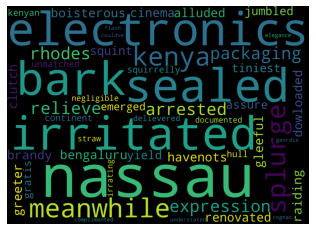

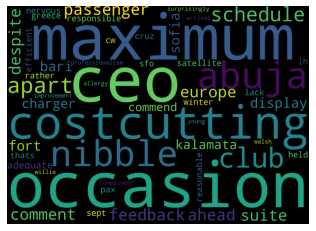

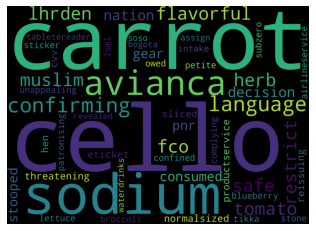

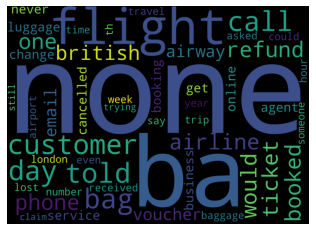

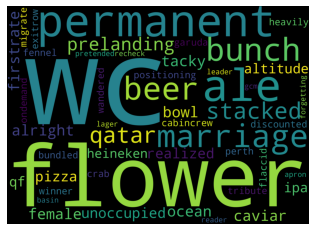

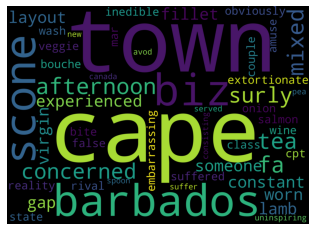

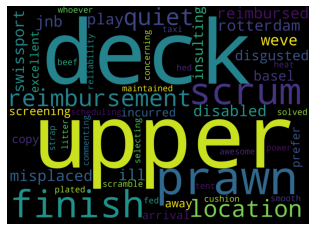

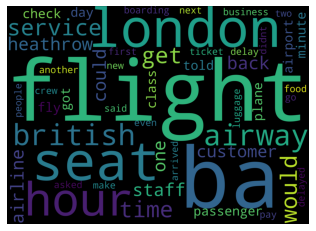

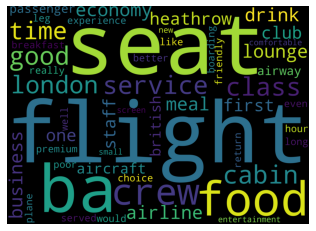

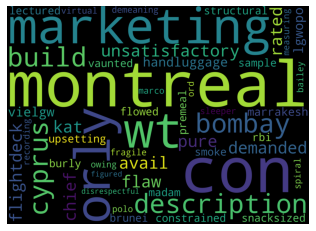

In [42]:
# num_topic = 10

for k in range(num_topic):
    first_topic = LDA.components_[k]
    first_topic_words = [feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
    firstcloud = WordCloud(
                              stopwords=stop_words,
                              background_color='black',
                              width=2500,
                              height=1800
                             ).generate(" ".join(first_topic_words))
    plt.imshow(firstcloud)
    plt.axis('off')
    plt.show()

## 3. Sentiment Analysis with VADER Sentiment Analysis

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SentimentAnalyzer = SentimentIntensityAnalyzer()

In [49]:
def VADERanalysis(review):
    vs = SentimentAnalyzer.polarity_scores(review)
    return vs['compound']

In [53]:
def sentimentCat(compound):                
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [50]:
# add a new column about the polarity score from sentiment analysis
df['Sentiment'] = df['reviews'].apply(VADERanalysis)

In [55]:
df['Analysis'] = df['Sentiment'].apply(sentimentCat)

In [56]:
df.head()

,reviews,Sentiment,Analysis
0,old narrow pitch flight perfectly time constan...,0.8934,Positive
1,another ba shamble started well excellent chec...,0.9274,Positive
2,ba cancelled flight home heathrow dec th face ...,-0.9360,Negative
3,ba cancelled flight home last flight day heath...,-0.5859,Negative
4,turned hour advance terminal london heathrow a...,-0.6808,Negative


In [57]:
sent_analysis = df['Analysis'].value_counts()
sent_analysis

Neutral     1745
Positive     991
Negative     706
Name: Analysis, dtype: int64

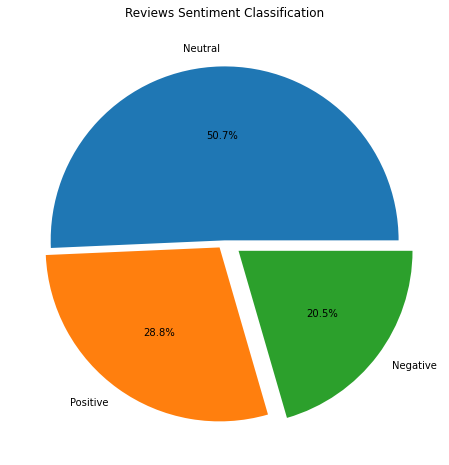

In [61]:
plt.figure(figsize=(20,8))
plt.title("Reviews Sentiment Classification")
plt.pie(sent_analysis.values, labels = sent_analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False)
plt.show()

## Top 50 words (Frequencies)

In [65]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [72]:
all_words = df['reviews'].str.split(expand=True).unstack().value_counts()

In [79]:
all_words[:50]

flight        4219
ba            2706
seat          2154
service       1635
None          1523
london        1510
time          1260
food          1190
crew          1109
airway        1098
british       1096
airline       1062
hour          1028
cabin         1026
class         1012
good           940
one            919
heathrow       884
business       855
staff          839
would          837
get            762
economy        745
passenger      695
meal           632
first          628
u              616
drink          608
customer       597
plane          592
back           582
even           552
lounge         546
boarding       544
bag            530
could          527
experience     505
check          504
day            498
return         488
told           476
club           464
fly            462
aircraft       454
new            446
airport        426
like           426
minute         421
premium        391
year           381
dtype: int64

In [77]:
data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

In [78]:
layout = go.Layout(
    title='Top 50 Word frequencies'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

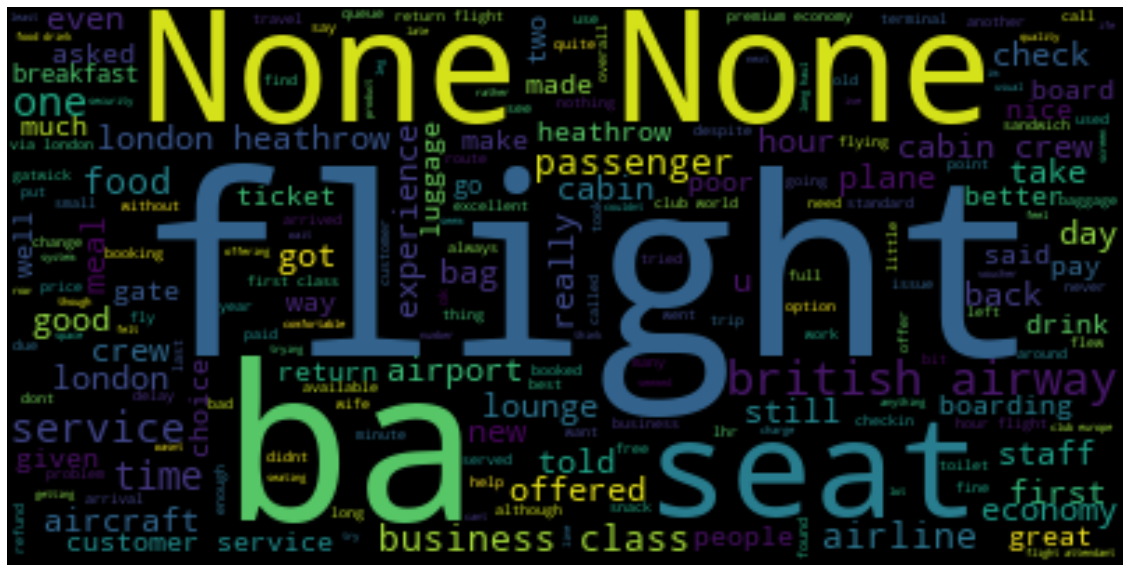

In [81]:
text = " ".join(i for i in df.reviews)
wordcloud = WordCloud().generate(text)
fig = plt.figure(1, figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()